In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [6]:
df = pd.read_csv(r"C:\Users\KIIT0001\PycharmProjects\PythonProject\Machine learning\learning\Tutorial\population_profit.csv")
print(df.head())


   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


Conversion of the dataset into numpy array , if data is already preprocessed then no need to do that


In [9]:
arr = df.to_numpy()
print(type(arr))
print(arr)
print(arr.shape)

<class 'numpy.ndarray'>
[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]]
(20, 2)


In [35]:
x_train = arr[:,0].reshape(-1,1)  # conversion of 2 d matrix into column vector and this is the population data
y_train = arr[:,1] # this is the profit data of the dataset


y_train.shape

(20,)

calculating the cost  of the linear regression with one variable

hypothesis function :  f(x) = w.x + b
w: weight or parameter of the function
b: bias of the function

cost function is represented as J(w,b) = 1/(2*m) ∑(summation range:i=1 to m)(f(x)-y(i))**2

m: no. of training example
y(i): real value
f(x) - y(i):error from the real value
cost  function finds us the average of  the sum of the mean squared error



In [24]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i]+b
        error = f_wb - y[i]
        cost += error**2
    total_cost = (1/(2*m))*cost
    return total_cost


now we will calculate gradient

In this section we will create the function to find the dj_dw , dj_db:
so our main objective is to minimize the value of the cost function and put that value in the gradient descent and that part we will solve in the next part .

so now we will  see the value of the dj_dw and dj_db in pseudo code format :
if we do the differentiation of the dj_dw we will get  this:
dj_dw = 1/m * ∑(summation range:1 to m) (f_wb-y[i])*x[i]
now we will do the differentiation of dj_db
dj_db = 1/m * ∑(summation range:1 to m) (f_wb-y[i])


In [25]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw =0
    dj_db =0
    for i in range(m):
        f_wb = w*x[i]+b
        error= f_wb-y[i]
        dj_dw += error*x[i]
        dj_db += error
    dj_dw = (1/m)*dj_dw
    dj_db = (1/m)*dj_db
    return dj_dw,dj_db


Now the main thing that will help us to calculate the gradient descent

In [41]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    w_temp = w
    b_temp = b
    j_history = []
    p_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w_temp, b_temp)

        w_temp = w_temp - alpha * dj_dw
        b_temp = b_temp - alpha * dj_db

        if i < 100000:
            j_history.append(compute_cost(x, y, w_temp, b_temp))
            p_history.append([w_temp, b_temp])

        if i % math.ceil(num_iters / 10) == 0:
            # Check if dj_dw is scalar or iterable
            if np.isscalar(dj_dw):
                print(f"dj_dw: {dj_dw:0.2e}")
            else:
                print("dj_dw:", ", ".join(f"{x:0.2e}" for x in dj_dw))
            print(f"dj_db: {dj_db:0.2e}")

    return w_temp, b_temp, j_history, p_history


Training the model

In [42]:
# Initialize parameters
initial_w = 0
initial_b = 0
iterations = 1500
alpha = 0.01

# Train the model
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, initial_w, initial_b, alpha, iterations)

print(f"Trained weight: {w_final}")
print(f"Trained bias: {b_final}")


dj_dw: -5.66e+01
dj_db: -7.30e+00
dj_dw: -2.71e-02
dj_db: 2.04e-01
dj_dw: -2.42e-02
dj_db: 1.82e-01
dj_dw: -2.16e-02
dj_db: 1.63e-01
dj_dw: -1.93e-02
dj_db: 1.45e-01
dj_dw: -1.72e-02
dj_db: 1.30e-01
dj_dw: -1.54e-02
dj_db: 1.16e-01
dj_dw: -1.38e-02
dj_db: 1.03e-01
dj_dw: -1.23e-02
dj_db: 9.23e-02
dj_dw: -1.10e-02
dj_db: 8.24e-02
Trained weight: 1.3354895756170568
Trained bias: -1.910860066379901


In [45]:
def predict(x, w, b):
    return w * x + b

# Predict profit for a city with population 35,000
pop1 = 3.5
profit1 = predict(pop1, w_final, b_final)
print(f"Predicted profit for population 35,000: ${profit1 * 10000:.2f}")

# Predict profit for a city with population 70,000
pop2 = 7.0
profit2 = predict(pop2, w_final, b_final)
print(f"Predicted profit for population 70,000: ${profit2 * 10000:.2f}")


Predicted profit for population 35,000: $27633.53
Predicted profit for population 70,000: $74375.67


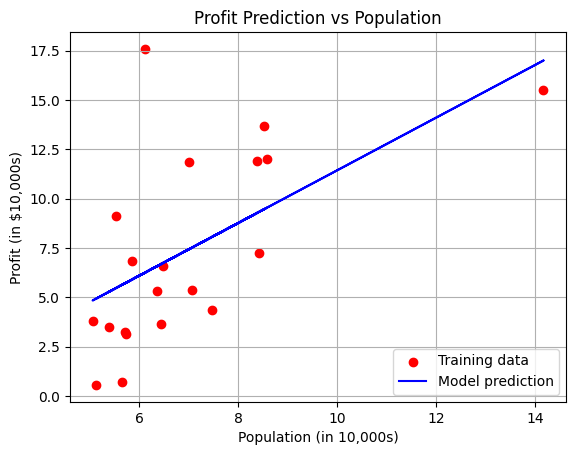

In [46]:
# Plotting the training data and model prediction
plt.scatter(x_train, y_train, color='red', label="Training data")
plt.plot(x_train, w_final * x_train + b_final, color='blue', label="Model prediction")
plt.xlabel("Population (in 10,000s)")
plt.ylabel("Profit (in $10,000s)")
plt.title("Profit Prediction vs Population")
plt.legend()
plt.grid(True)
plt.show()


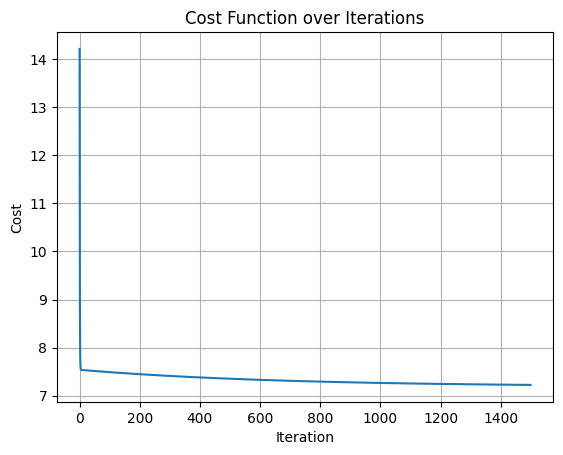

In [47]:
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.grid(True)
plt.show()
